In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats # it contains a large number of statistics, probability distributions functions

from sklearn import preprocessing # provides the StandardScaler utility class, which is a quick and easy way to perform operations
from sklearn.preprocessing import StandardScaler # To normalize the data for KNNImputer
from sklearn.impute import KNNImputer # Imputation for completing missing values using k-Nearest Neighbors
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import optuna
from optuna.trial import TrialState

from sklearn.ensemble import RandomForestRegressor  

/home/javak/miniconda3/envs/seqana_test/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
optuna.__version__

'3.0.5'

In [2]:
signal=pd.read_csv('221202_seqana_data_science_working_student_challenge_dataset.csv')

In [3]:
signal.head()

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
0,2012,894,899.792969,898,892,894,895.900574,0.306919,-4,183,...,3374.608696,1089.260870,1546.869565,1574.503874,2215.650847,1688.021295,1375.511632,1220.169482,654.961158,68.793925
1,2011,61,56.898190,58,58,57,58.000286,0.123088,-7,181,...,2709.608696,374.478261,1166.391304,1582.043952,1427.600306,307.310126,999.502956,167.002686,501.502718,87.265779
2,2011,92,92.471191,89,91,90,92.729630,0.046061,-1,181,...,3195.043478,414.347826,1221.347826,1927.965549,1960.699712,583.722087,1090.225101,322.372259,434.762277,96.650384
3,2011,1560,1572.300049,1622,1570,1549,1547.678345,0.781243,-17,160,...,4063.727273,1790.043478,928.956522,1010.631962,1903.293570,2179.134552,2019.112468,1884.017720,472.453507,68.400738
4,2011,1176,1175.498901,1179,1176,1176,1170.957031,0.210475,-2,181,...,2652.260870,1022.217391,864.565217,646.826519,1687.594992,922.467112,857.199362,1366.888502,303.002824,35.314235


In [4]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Columns: 306 entries, year to soc_stock_t_ha
dtypes: float64(212), int64(94)
memory usage: 11.9 MB


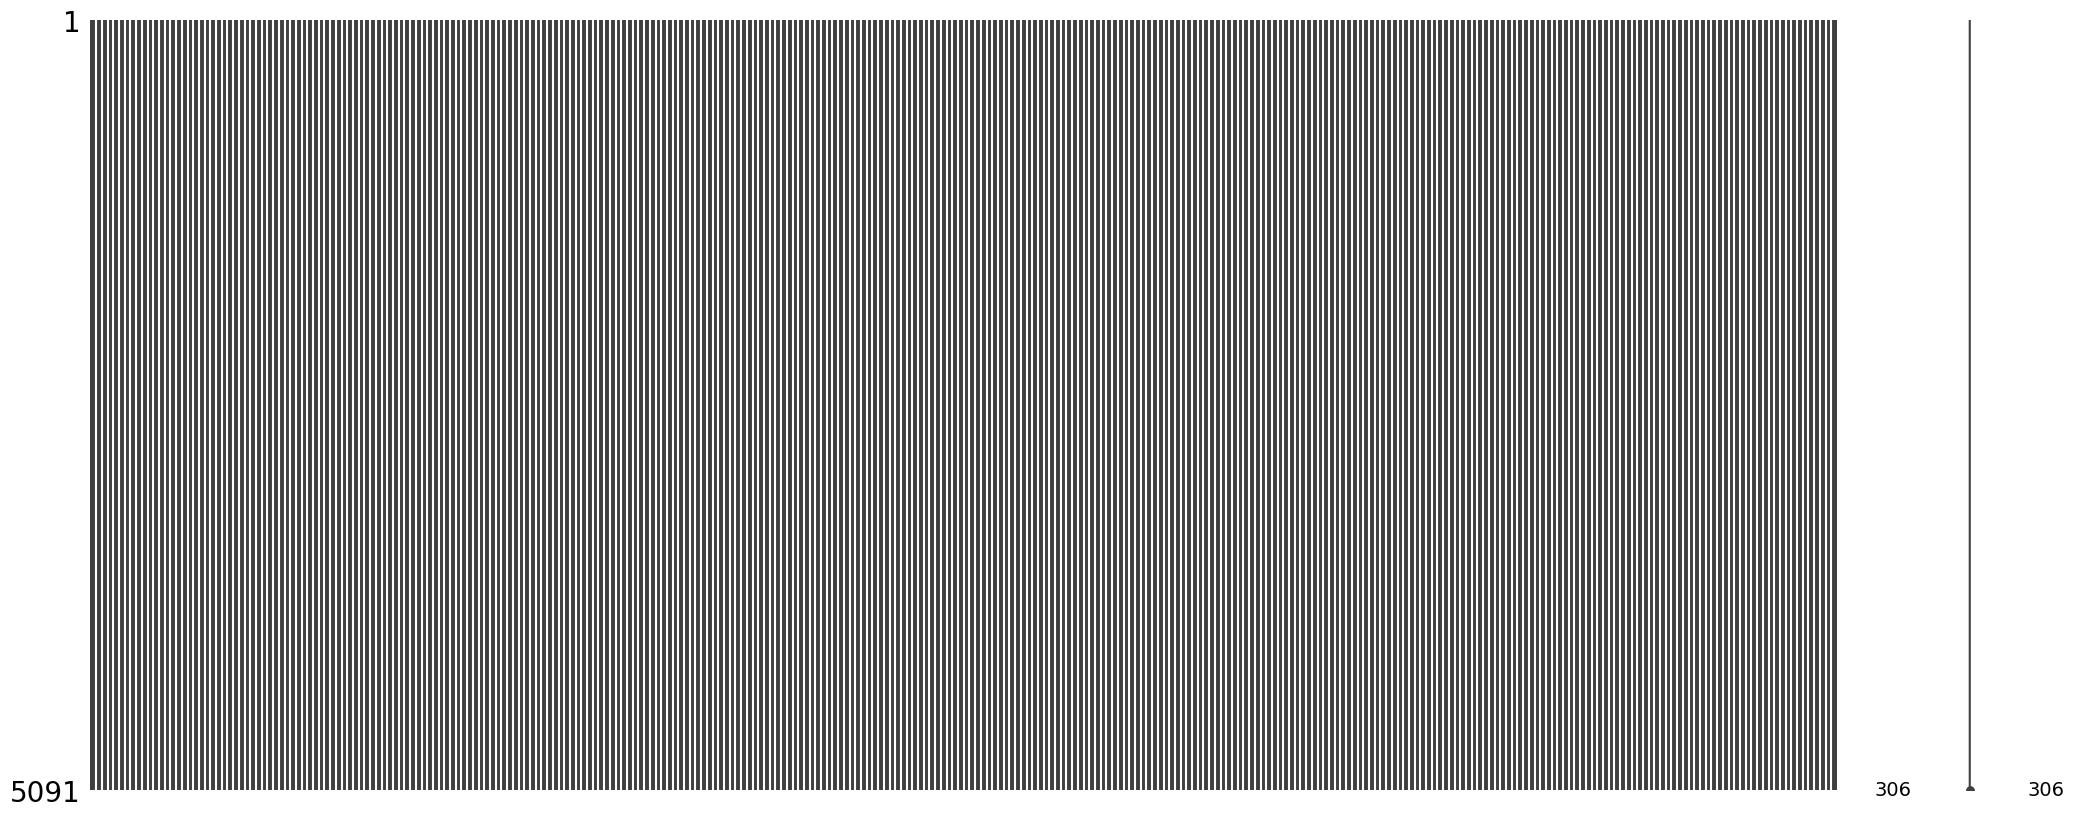

In [5]:
#the blank space in the matrix that gets plotted indicate the number of missing values visually
msno.matrix(signal);

In [6]:
signal.isnull().sum().sum()

0

In [7]:
signal.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5091.0,2011.011589,0.285303,2011.000000,2011.000000,2011.000000,2011.000000,2019.000000
dem_nasa_dem30,5091.0,703.000982,689.395483,-64.000000,178.500000,383.000000,1228.000000,3531.000000
dem_merit,5091.0,702.989512,689.818076,-62.485870,177.082237,382.266815,1228.776917,3521.041748
dem_gmted,5091.0,704.887056,689.329857,-62.000000,179.000000,384.000000,1230.000000,3523.000000
dem_srtm90_v4,5091.0,704.098409,689.650488,-64.000000,179.000000,383.000000,1229.000000,3580.000000
...,...,...,...,...,...,...,...,...
sur_refl_b01_std_sampling_year,5091.0,1065.661213,1005.472648,44.805950,222.691322,639.540645,1741.368234,3867.800669
sur_refl_b02_std_sampling_year,5091.0,1068.488921,618.375897,121.464499,588.573861,924.875167,1392.175076,3193.912846
sur_refl_b03_std_sampling_year,5091.0,1036.451850,1079.210268,25.795410,107.901579,649.356386,1767.075432,4049.046509
sur_refl_b07_std_sampling_year,5091.0,453.205834,197.820808,72.230034,305.694851,415.923707,572.038427,1249.752010


In [8]:
column=signal.columns

In [9]:
nunique = signal.apply(pd.Series.nunique)
nunique

year                                 4
dem_nasa_dem30                    1800
dem_merit                         5085
dem_gmted                         1811
dem_srtm90_v4                     1779
                                  ... 
sur_refl_b01_std_sampling_year    5083
sur_refl_b02_std_sampling_year    5083
sur_refl_b03_std_sampling_year    5073
sur_refl_b07_std_sampling_year    5074
soc_stock_t_ha                    5091
Length: 306, dtype: int64

In [10]:
# Create correlation matrix
corr_matrix = signal.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop1 = [column for column in upper.columns if any(upper[column] < -0.97)]
to_drop2 = [column for column in upper.columns if any(upper[column] > 0.97)]
print(to_drop1)
print(to_drop2)
drop=to_drop1+to_drop2

[]
['dem_merit', 'dem_gmted', 'dem_srtm90_v4', 'dem_nasa_srtm30', 'dem_usgs_ned', 'soil_olm_bd_b10', 'soil_olm_clay_b10', 'soil_olm_ph_b10', 'soil_olm_ph_b30', 'soil_olm_ph_b60', 'soil_olm_ph_b100', 'soil_olm_sand_b10', 'soil_olm_sand_b30', 'soil_olm_sand_b60', 'soil_olm_sand_b100', 'soil_olm_water_content_b10', 'soil_olm_water_content_b100', 'soil_grids_clay_5_15', 'soil_grids_clay_60_100', 'soil_grids_phh2o_5_15', 'soil_grids_phh2o_15_30', 'soil_grids_phh2o_30_60', 'soil_grids_phh2o_60_100', 'soil_grids_cfvo_5_15', 'soil_grids_cfvo_15_30', 'soil_grids_cfvo_30_60', 'soil_grids_cfvo_60_100', 'soil_grids_sand_5_15', 'soil_grids_sand_15_30', 'soil_grids_sand_30_60', 'soil_grids_sand_60_100', 'soil_grids_silt_5_15', 'soil_grids_silt_15_30', 'soil_grids_silt_30_60', 'soil_grids_silt_60_100', 'soil_grids_nitrogen_30_60', 'LST_Day_1km_02_mean', 'LST_Day_1km_08_mean', 'LST_Day_1km_12_mean', 'LST_Night_1km_02_mean', 'LST_Night_1km_03_mean', 'LST_Night_1km_04_mean', 'LST_Night_1km_05_mean', 'LS

In [11]:
df=signal.drop(drop,1)
df.shape

/tmp/ipykernel_10227/1548877416.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=signal.drop(drop,1)


(5091, 227)

In [12]:
# Funtion for Outlier treatment
def Outlier(X, outlier_treatment) :
    
    if outlier_treatment == 'NaN' :
        # calculating the z score of the values
        z_train= pd.DataFrame(stats.zscore(X,nan_policy='omit'))
        z_train

        # calculating the number of outliers
        print('Number of Outliers : ',sum(z_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

        #Outlier treatment : replacing outliers with NA to impute all NA values
        is_outlier = abs(z_train)>3
        is_outlier.columns = X.columns
        is_outlier.index = X.index
        return(X.mask(is_outlier, np.nan))
    
    elif outlier_treatment == '3s':
        boundary = 3
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
        X = X.apply(lambda x : [y if y < boundary or np.isnan(y) else boundary for y in x])
        X = X.apply(lambda x : [y if y > -1*boundary or np.isnan(y) else -1*boundary for y in x])
        
        # for inverse transformation
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        X_inverse.columns = X.columns
        return(X_inverse)

In [13]:
# Outlier treatment with NA values
new_df = Outlier(df, 'NaN')

Number of Outliers :  10091


In [14]:
# function for imputing missing values
def MissingValueImputation(X, Imputer) :
    
    if Imputer == 'KNN' :
        
        #Scaling
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
        
        #define imputer
        KNN_imputer = KNNImputer(n_neighbors=30, weights = 'uniform')

        #fit on the dataset
        X = KNN_imputer.fit_transform(X)
        
        #Inverse tranform of scaling
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        return(X_inverse)
        
    elif Imputer == 'MICE' :
        
        #define imputer
        MICE_imputer = IterativeImputer(max_iter=20, sample_posterior=False, random_state=100)
        
        #fit dataset
        return(MICE_imputer.fit_transform(X))

In [15]:
# impute using knn
features = new_df.copy(deep=True)
features.iloc[:,:] = pd.DataFrame(MissingValueImputation(new_df,'KNN'))

In [16]:
features.shape

(5091, 227)

In [17]:
feature=features.drop("soc_stock_t_ha",1)
y=features["soc_stock_t_ha"]
col=list(feature.columns)

/tmp/ipykernel_10227/3355252194.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  feature=features.drop("soc_stock_t_ha",1)


In [18]:
sc=StandardScaler()
scaled_feature = sc.fit_transform(feature)
scaled_feature = pd.DataFrame(scaled_feature,columns=col)

In [19]:
# Creating a covariance matrix

cov_matrix = np.cov(scaled_feature.T)
print('Covariance Matrix \n', cov_matrix)
      
#perform an eigendecomposition on the covariance matrix:

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)  

Covariance Matrix 
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00019646  0.32801282 ...  0.31982161  0.22799099
   0.31771171]
 [ 0.          0.32801282  1.00019646 ... -0.05047646 -0.01595757
  -0.16840047]
 ...
 [ 0.          0.31982161 -0.05047646 ...  1.00019646  0.93366274
   0.58091726]
 [ 0.          0.22799099 -0.01595757 ...  0.93366274  1.00019646
   0.55197364]
 [ 0.          0.31771171 -0.16840047 ...  0.58091726  0.55197364
   1.00019646]]


In [20]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.63159809  44.39892797  54.78102556  60.14799416  64.416251
  67.20354351  69.80812923  71.95317439  74.00411882  75.46762152
  76.74781149  77.8391745   78.83311706  79.73336091  80.55452124
  81.32316553  82.06038889  82.75392712  83.36902291  83.95023235
  84.49291236  85.02209612  85.52965299  85.99608531  86.45108083
  86.89552866  87.2994599   87.6968128   88.08700853  88.46559701
  88.81250924  89.14822941  89.47639732  89.79791903  90.10098845
  90.38566012  90.65439486  90.90723315  91.15140542  91.39460462
  91.62847046  91.84997837  92.05949425  92.2633375   92.45920201
  92.64895345  92.8302447   93.00432175  93.17163593  93.33192382
  93.49108259  93.64572474  93.7993618   93.94419036  94.083198
  94.21959409  94.35069018  94.48012405  94.60727053  94.72883019
  94.83983458  94.94989018  95.05847254  95.16180059  95.2647364
  95.36533122  95.46334371  95.5602108   95.65579198  95.74985403
  95.8430338   95.93255581  96.02012741  96.1075074

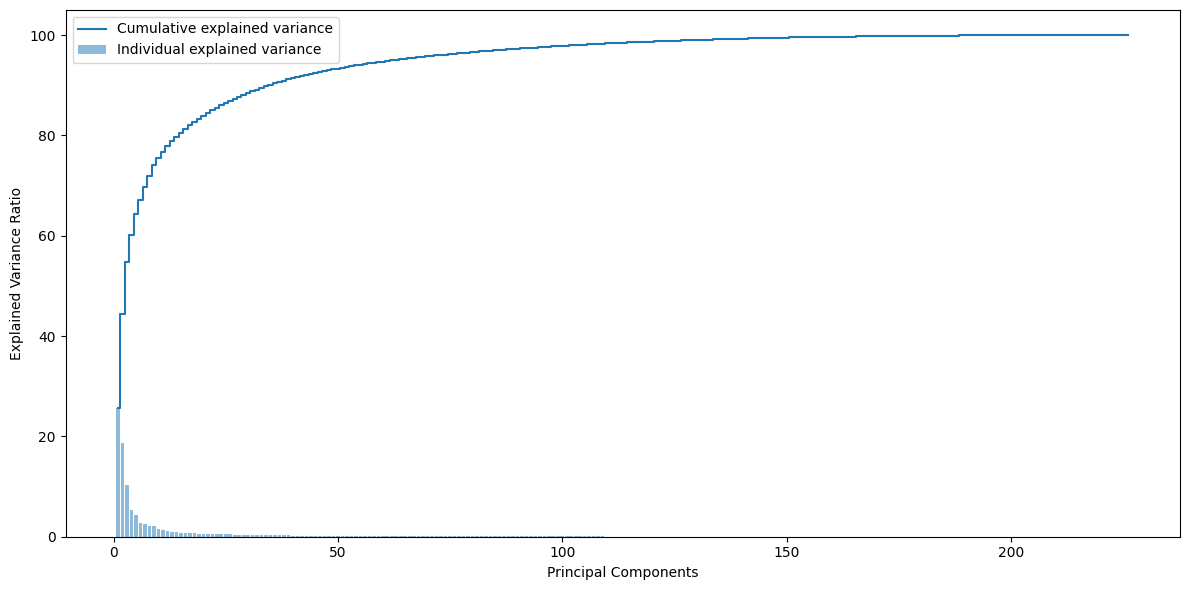

In [21]:
plt.figure(figsize=(12 ,6))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show() 

In [22]:
pca = PCA(n_components=scaled_feature.shape[1],random_state=1).fit(scaled_feature.values)
a = np.cumsum(pca.explained_variance_ratio_)

In [23]:
i = 0
while a[i] < 0.99:
    i = i+1
f'Number of dimensions needed to capture 99%% of variance:{i}'

'Number of dimensions needed to capture 99%% of variance:128'

In [24]:
# PCA with reduced number of components

pca = PCA(n_components=i,random_state=1)
pca.fit(scaled_feature)
print(pca.components_)

pca_df= pd.DataFrame(pca.fit_transform(scaled_feature))

[[-1.11022302e-16  8.42185010e-02 -2.17846761e-02 ...  4.88198184e-02
   2.97547958e-02  7.58329123e-02]
 [ 1.11022302e-16  2.11913109e-02  2.16022722e-02 ...  1.25930714e-01
   1.23510750e-01  5.61341774e-02]
 [-2.77555756e-17 -8.81400414e-02 -1.13441158e-01 ...  1.50109224e-02
   2.46167194e-02  6.80830900e-02]
 ...
 [ 1.77589466e-17  5.29968370e-02 -7.39580913e-04 ... -6.70710629e-02
  -4.58435298e-02  1.36454269e-01]
 [ 7.18314865e-17  3.11152271e-03  2.08514151e-02 ...  2.78568694e-02
   8.50593349e-02 -1.23687373e-02]
 [-4.15545648e-17 -2.12178576e-01  2.59203747e-02 ... -8.62506826e-03
  -1.08189572e-01  2.93687688e-02]]


In [25]:
pca_df.shape

(5091, 128)

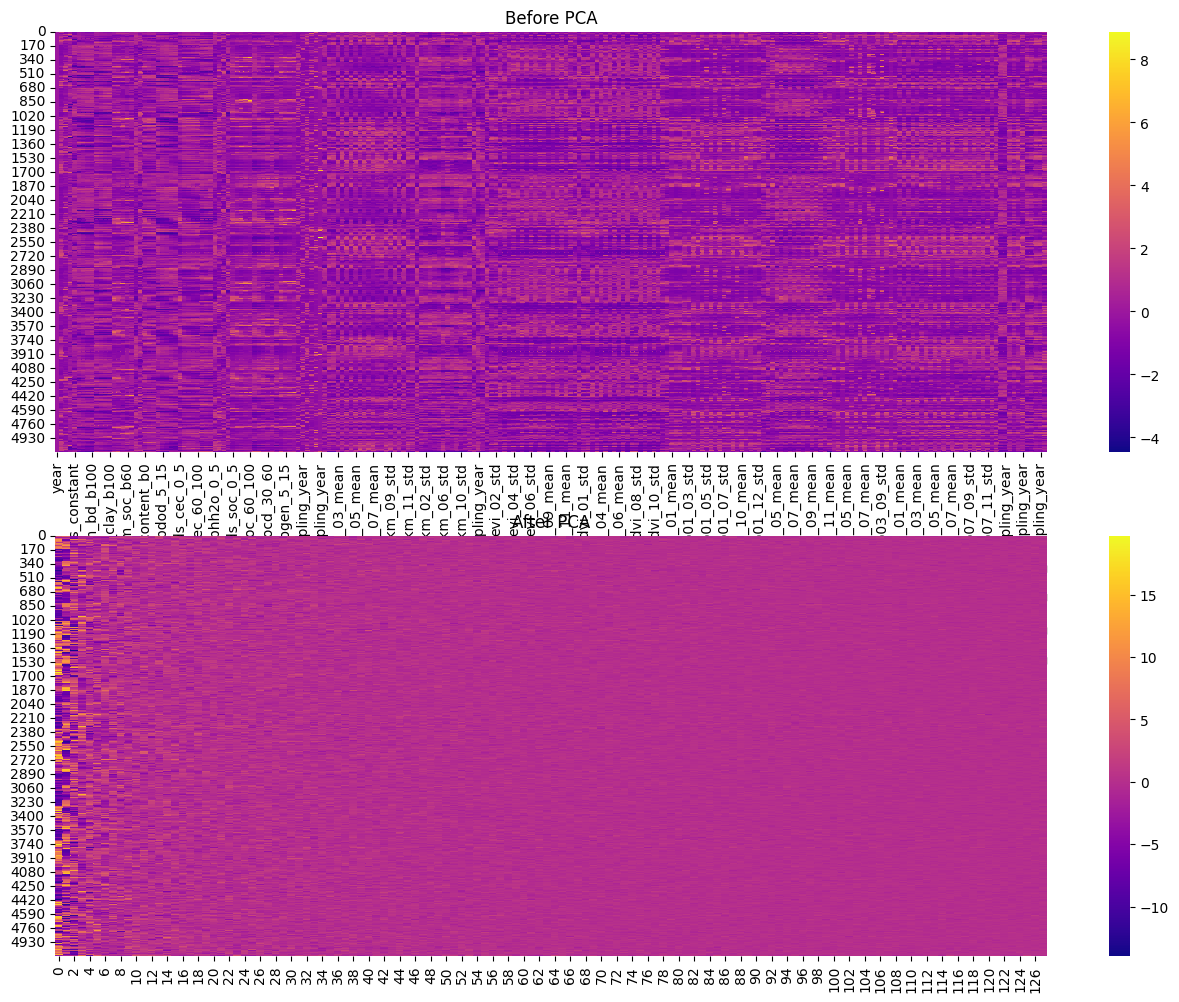

In [26]:
f, (ax_heatmap, ax_heatmap2) = plt.subplots(2,figsize=(16,12))
ax_heatmap.set_title('Before PCA')
ax_heatmap2.set_title('After PCA')

sns.heatmap(scaled_feature,ax=ax_heatmap,cmap='plasma');
sns.heatmap(pca_df,ax=ax_heatmap2,cmap='plasma');

In [27]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size =0.2,random_state =1)

In [28]:
regr = MLPRegressor(hidden_layer_sizes=(50,50,20, 10, 10), activation='relu', solver='adam', alpha=20, batch_size=2000,
                    learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=5000,
                    shuffle=True, random_state=1, tol=0.0001, verbose=10, warm_start=True,
                    momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.2,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=100)

In [29]:
regr.fit(X_train, y_train)

Iteration 1, loss = 3003.70069615
Validation score: -1.573022
Iteration 2, loss = 2983.63677901
Validation score: -1.555540
Iteration 3, loss = 2960.47866180
Validation score: -1.535618
Iteration 4, loss = 2934.87117739
Validation score: -1.513135
Iteration 5, loss = 2905.55807363
Validation score: -1.487734
Iteration 6, loss = 2872.93365609
Validation score: -1.459140
Iteration 7, loss = 2835.88774088
Validation score: -1.426924
Iteration 8, loss = 2794.46285245
Validation score: -1.390557
Iteration 9, loss = 2747.90648488
Validation score: -1.349762
Iteration 10, loss = 2695.50127630
Validation score: -1.303875
Iteration 11, loss = 2636.81802253
Validation score: -1.252432
Iteration 12, loss = 2571.69776160
Validation score: -1.194863
Iteration 13, loss = 2497.30938157
Validation score: -1.130534
Iteration 14, loss = 2415.29301911
Validation score: -1.058787
Iteration 15, loss = 2324.83370724
Validation score: -0.979019
Iteration 16, loss = 2223.49537402
Validation score: -0.890833
I

MLPRegressor(alpha=20, batch_size=2000, early_stopping=True,
             hidden_layer_sizes=(50, 50, 20, 10, 10), learning_rate='adaptive',
             max_iter=5000, n_iter_no_change=100, random_state=1,
             validation_fraction=0.2, verbose=10, warm_start=True)

In [30]:
regr.score(X_train, y_train)

0.569284179118938

In [31]:
regr.score(X_test, y_test)

0.3679495306413081

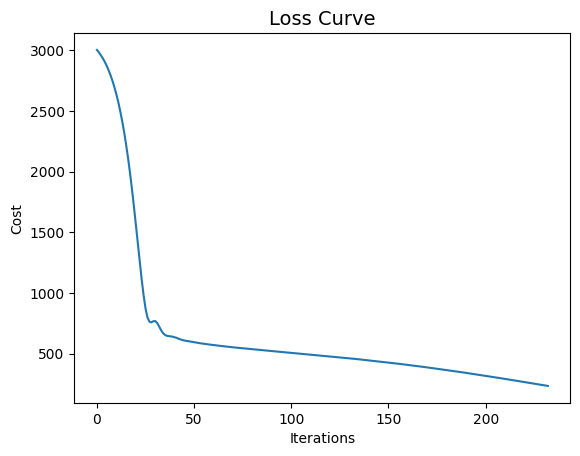

In [32]:
plt.plot(regr.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [33]:
def objective(trial):
    solver = trial.suggest_categorical("solver", ["adam", "lbfgs"])
    learning_rate=trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"])
    activation  = trial.suggest_categorical("activation", ["tanh", "relu"])
    learning_rate_init = trial.suggest_float("learning_rate_init", 0.001, 0.01, log=True)
    hidden_layer_sizes=(14,6,37, 14,16)
    random_state=1
    early_stopping=True
    n_iter_no_change=100
    ## Create Model
    regressor = MLPRegressor(hidden_layer_sizes= hidden_layer_sizes, learning_rate = learning_rate, learning_rate_init = learning_rate_init, 
                             random_state=random_state, activation = activation, early_stopping=early_stopping, n_iter_no_change=n_iter_no_change,
                             solver=solver)
    regressor.fit(X_train, y_train)

    return regressor.score(X_test, y_test)

In [34]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, timeout=600)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-12-23 19:24:48,433] A new study created in memory with name: no-name-310a127b-a98f-45c0-b17c-2097d66cb13f
/home/javak/miniconda3/envs/seqana_test/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2022-12-23 19:25:22,026] Trial 0 finished with value: 0.16906977444456284 and parameters: {'solver': 'adam', 'learning_rate': 'constant', 'activation': 'tanh', 'learning_rate_init': 0.005128297260401295}. Best is trial 0 with value: 0.16906977444456284.
/home/javak/miniconda3/envs/seqana_test/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2022-12-23 19:25:52,322] Trial 1 finished with value: 0.2534934240608663 and parameters: {'solver': 'adam', 'lea

Study statistics: 
  Number of finished trials:  20
  Number of pruned trials:  0
  Number of complete trials:  20
Best trial:
  Value:  0.37192309795093415
  Params: 
    solver: adam
    learning_rate: invscaling
    activation: relu
    learning_rate_init: 0.0026177710655914703


In [42]:
regr = MLPRegressor(hidden_layer_sizes=(14,6,37, 14,16), activation='relu', solver='adam', batch_size=2000,
                    learning_rate='invscaling', learning_rate_init=0.0026, max_iter=5000, random_state=1, early_stopping=True, n_iter_no_change=100)

In [43]:
regr.fit(X_train, y_train)

MLPRegressor(batch_size=2000, early_stopping=True,
             hidden_layer_sizes=(14, 6, 37, 14, 16), learning_rate='invscaling',
             learning_rate_init=0.0026, max_iter=5000, n_iter_no_change=100,
             random_state=1)

In [44]:
regr.score(X_train, y_train)

0.5534565339816996

In [45]:
regr.score(X_test, y_test)

0.37092044386541734

In [39]:
reg_model = RandomForestRegressor(max_depth = 16, n_estimators = 250)
reg_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=250)

In [40]:
reg_model.score(X_train,y_train)

0.8924094219013977

In [41]:
reg_model.score(X_test,y_test)

0.36129887533469973